In [10]:
import pandas as pd # Data frames
import numpy as np

from sklearn import tree # machine learning library for python
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

## Spotify Song Attributes EDA
- Import Dataset
- EDA to visualize and observe structure
- Train a classifier
- Predict target using the trained classifier

In [12]:
data = pd.read_csv('data/data.csv')

In [4]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe() # A stat analysis of the data set

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
data.head() # 5 rows just to inspect the data set

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [8]:
train, test = train_test_split(data, test_size = 0.15) # split %15 for testing

In [11]:
print("Training size: {}; Test size {}".format(len(train),len(test)))

Training size: 1714; Test size 303


In [45]:
green_blue = ["#1ED497", "#213DDB"]
pal = sns.color_palette(green_blue)
sns.set_palette(pal)
sns.set_style("white")

<AxesSubplot:title={'center':'Song speechiness Like/Dislike Distribution'}, xlabel='speechiness', ylabel='count'>

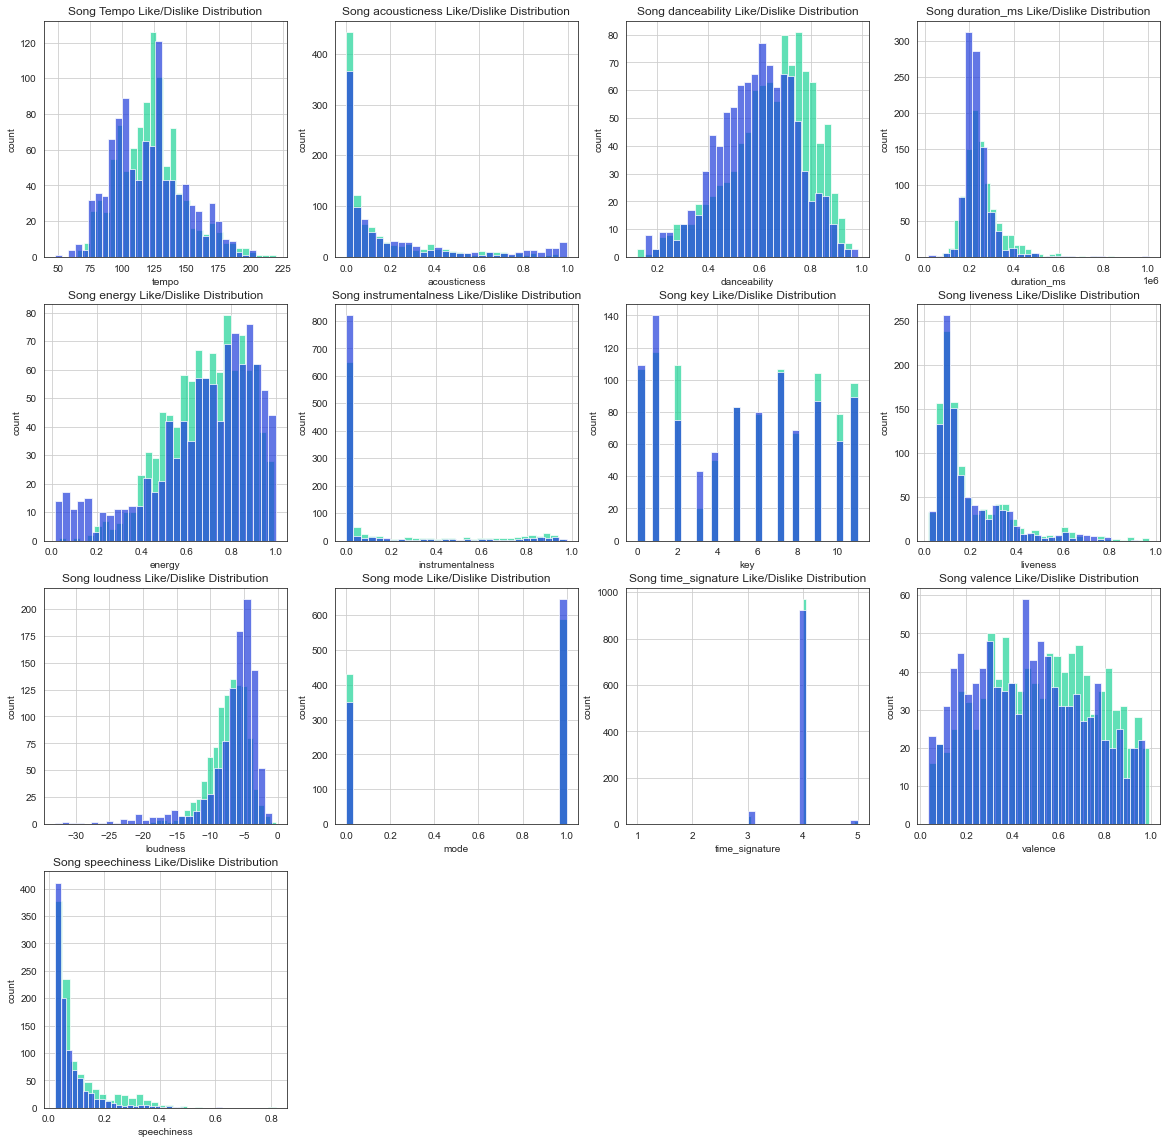

In [71]:
pos_tempo = data[data['target']==1]['tempo']
neg_tempo = data[data['target']==0]['tempo']
pos_acousticness = data[data['target']==1]['acousticness']
neg_acousticness = data[data['target']==0]['acousticness']
pos_danceability = data[data['target']==1]['danceability']
neg_danceability = data[data['target']==0]['danceability']
pos_duration = data[data['target']==1]['duration_ms']
neg_duration = data[data['target']==0]['duration_ms']
pos_energy = data[data['target']==1]['energy']
neg_energy = data[data['target']==0]['energy']
pos_instrumentalness = data[data['target']==1]['instrumentalness']
neg_instrumentalness = data[data['target']==0]['instrumentalness']
pos_key = data[data['target']==1]['key']
neg_key = data[data['target']==0]['key']
pos_liveness = data[data['target']==1]['liveness']
neg_liveness = data[data['target']==0]['liveness']
pos_loudness = data[data['target']==1]['loudness']
neg_loudness = data[data['target']==0]['loudness']
pos_mode = data[data['target']==1]['mode']
neg_mode = data[data['target']==0]['mode']
pos_time = data[data['target']==1]['time_signature']
neg_time = data[data['target']==0]['time_signature']
pos_valence = data[data['target']==1]['valence']
neg_valence = data[data['target']==0]['valence']
pos_speechiness = data[data['target']==1]['speechiness']
neg_speechiness = data[data['target']==0]['speechiness']

fig = plt.figure(figsize=(20,20))

# tempo
ax3 = fig.add_subplot(441)
ax3.set_xlabel('tempo')
ax3.set_ylabel('count')
ax3.set_title('Song Tempo Like/Dislike Distribution')
pos_tempo.hist(alpha = 0.7, bins = 30)
neg_tempo.hist(alpha = 0.7, bins = 30)

# acousticness
ax3 = fig.add_subplot(442)
ax3.set_xlabel('acousticness')
ax3.set_ylabel('count')
ax3.set_title('Song acousticness Like/Dislike Distribution')
pos_acousticness.hist(alpha = 0.7, bins = 30)
neg_acousticness.hist(alpha = 0.7, bins = 30)

# danceability
ax3 = fig.add_subplot(443)
ax3.set_xlabel('danceability')
ax3.set_ylabel('count')
ax3.set_title('Song danceability Like/Dislike Distribution')
pos_danceability.hist(alpha = 0.7, bins = 30)
neg_danceability.hist(alpha = 0.7, bins = 30)

# duration_ms
ax3 = fig.add_subplot(444)
ax3.set_xlabel('duration_ms')
ax3.set_ylabel('count')
ax3.set_title('Song duration_ms Like/Dislike Distribution')
pos_duration.hist(alpha = 0.7, bins = 30)
neg_duration.hist(alpha = 0.7, bins = 30)

# energy
ax3 = fig.add_subplot(445)
ax3.set_xlabel('energy')
ax3.set_ylabel('count')
ax3.set_title('Song energy Like/Dislike Distribution')
pos_energy.hist(alpha = 0.7, bins = 30)
neg_energy.hist(alpha = 0.7, bins = 30)

# instrumentalness
ax3 = fig.add_subplot(446)
ax3.set_xlabel('instrumentalness')
ax3.set_ylabel('count')
ax3.set_title('Song instrumentalness Like/Dislike Distribution')
pos_instrumentalness.hist(alpha = 0.7, bins = 30)
neg_instrumentalness.hist(alpha = 0.7, bins = 30)

# key
ax3 = fig.add_subplot(447)
ax3.set_xlabel('key')
ax3.set_ylabel('count')
ax3.set_title('Song key Like/Dislike Distribution')
pos_key.hist(alpha = 0.7, bins = 30)
neg_key.hist(alpha = 0.7, bins = 30)

# liveness
ax3 = fig.add_subplot(448)
ax3.set_xlabel('liveness')
ax3.set_ylabel('count')
ax3.set_title('Song liveness Like/Dislike Distribution')
pos_liveness.hist(alpha = 0.7, bins = 30)
neg_liveness.hist(alpha = 0.7, bins = 30)

# loudness
ax3 = fig.add_subplot(449)
ax3.set_xlabel('loudness')
ax3.set_ylabel('count')
ax3.set_title('Song loudness Like/Dislike Distribution')
pos_loudness.hist(alpha = 0.7, bins = 30)
neg_loudness.hist(alpha = 0.7, bins = 30)

# mode
ax3 = fig.add_subplot(4,4,10)
ax3.set_xlabel('mode')
ax3.set_ylabel('count')
ax3.set_title('Song mode Like/Dislike Distribution')
pos_mode.hist(alpha = 0.7, bins = 30)
neg_mode.hist(alpha = 0.7, bins = 30)

# time_signature
ax3 = fig.add_subplot(4,4,11)
ax3.set_xlabel('time_signature')
ax3.set_ylabel('count')
ax3.set_title('Song time_signature Like/Dislike Distribution')
pos_time.hist(alpha = 0.7, bins = 30)
neg_time.hist(alpha = 0.7, bins = 30)

# valence
ax3 = fig.add_subplot(4,4,12)
ax3.set_xlabel('valence')
ax3.set_ylabel('count')
ax3.set_title('Song valence Like/Dislike Distribution')
pos_valence.hist(alpha = 0.7, bins = 30)
neg_valence.hist(alpha = 0.7, bins = 30)

# speechiness
ax3 = fig.add_subplot(4,4,13)
ax3.set_xlabel('speechiness')
ax3.set_ylabel('count')
ax3.set_title('Song speechiness Like/Dislike Distribution')
pos_speechiness.hist(alpha = 0.7, bins = 30)
neg_speechiness.hist(alpha = 0.7, bins = 30)

In [70]:
c = DecisionTreeClassifier(min_samples_split=100)

In [72]:
features = ['danceability','loudness','valence','energy','instrumentalness','acousticness', 'key','speechiness','duration_ms']